In [ ]:
pip install matplotlib

In [3]:
'''
TP2 ALC
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# leemos los .csv

train = pd.read_csv('mnist_train.csv',names=np.linspace(0,784,785))
test = pd.read_csv('mnist_test.csv',names=np.linspace(0,784,785))


In [5]:
train.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,775.0,776.0,777.0,778.0,779.0,780.0,781.0,782.0,783.0,784.0
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Ejercicio 1

 
### (a) Realizar una funcion en python que dado los datos de las imagenes de entrenamiento y una fila, grafique la imagen guardada en esa fila y en el tıtulo del grafico se indique a que numero corresponde, es decir su clasificacion. Usar la funcion imshow() de pyplot.


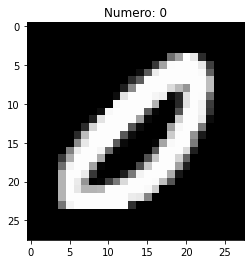

In [7]:

def graficar(df,fila):
    plt.imshow(np.array(df.iloc[fila,1:]).reshape(28,28),cmap='gray')
    numero = df.iloc[fila,0]
    plt.title(f'Numero: {numero}')
    plt.show()

#prueNumero: ',test.iloc[indices_imagenes_no_acertadas[r],0]ba:
    
fila = np.random.randint(0, len(train)) #Elegimos una imagen al azar
graficar(train,fila)

### (b) ¿Cuantas imagenes hay por cada dıgito en el conjunto de entrenamiento? ¿Y en el conjunto de testeo?

In [12]:
cantidad_de_imagenes_por_numero_train = train[0].value_counts().sort_index()
print("=========================\nConjunto de entrenamiento\n=========================")
print("Las cantidades por digito son: ")
print(cantidad_de_imagenes_por_numero_train)
cantidad_de_imagenes_por_numero_test = test[0].value_counts().sort_index()
print("=========================\nConjunto de testeo\n=========================")
print("Las cantidades por digito son: ")
print(cantidad_de_imagenes_por_numero_test)


Conjunto de entrenamiento
Las cantidades por digito son: 
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: 0.0, dtype: int64
Conjunto de testeo
Las cantidades por digito son: 
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
Name: 0.0, dtype: int64


In [13]:
# Muestro resultados en una sola tabla para una mejor comparacion
df_train = pd.DataFrame({'Conjunto de entrenamiento': cantidad_de_imagenes_por_numero_train})
df_test = pd.DataFrame({'Conjunto de testeo': cantidad_de_imagenes_por_numero_test})
df_combined = pd.concat([df_train, df_test], axis=1)
df_combined.index.name = 'Dígito'
print("====================================\nConjunto de entrenamiento y testeo\n====================================")
print("Las cantidades por dígito son: \n")
print(df_combined)

Conjunto de entrenamiento y testeo
Las cantidades por dígito son: 

        Conjunto de entrenamiento  Conjunto de testeo
Dígito                                               
0                            5923                 980
1                            6742                1135
2                            5958                1032
3                            6131                1010
4                            5842                 982
5                            5421                 892
6                            5918                 958
7                            6265                1028
8                            5851                 974
9                            5949                1009


### (c) Para las primeras 2.000 imagenes del conjunto de entrenamiento realizar una funcion en python que devuelva la imagen promedio de cada uno de los dıgitos.

In [15]:
imagenes_prom = []   #guardaremos las imagenes en un array para luego graficarlas

# aclaracion: las imagenes promedio guardaran el numero que representan en la posicion [0],
# para graficarlas habra que omitir el primer elemento del array

for n in range(0,10):
    df_n = train[train[0] == n].iloc[:2000,:]    #creamos df unicamente con las imagenes del numero n
    imagenes_n = df_n.to_numpy()    #convertimos el df en un array bidimensional de numpy
    imagen_promedio = np.mean(imagenes_n,axis=0)  # .mean() calcula el promedio de todas las imagenes que se encuentran como filas de la matriz 'imagenes_n'
    imagenes_prom.append(imagen_promedio)
    globals()['imagen_'+str(n)] = imagen_promedio   # asignamos la imagen promedio de cada numero 'n' a una variable llamada 'imagen_n' 



NameError: name 'imagenes' is not defined

### (d) Graficar cada una de las imagenes promedio obtenidas.

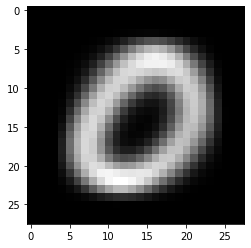

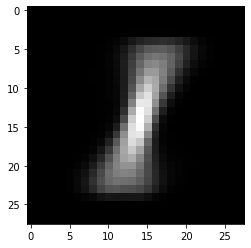

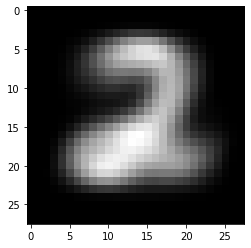

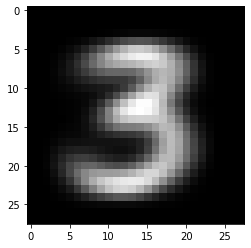

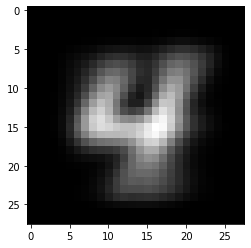

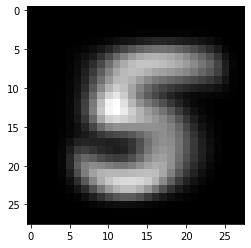

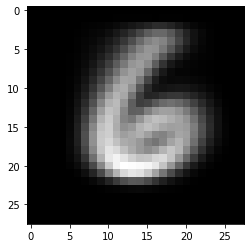

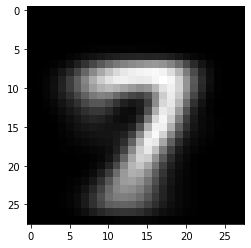

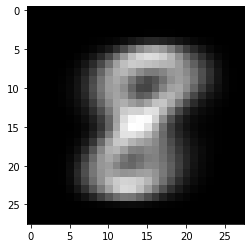

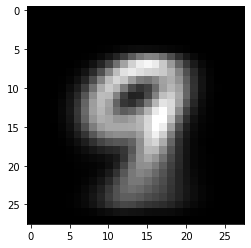

In [16]:

def graficar_imagenes():
    for imagen in imagenes_prom:
        plt.imshow(imagen[1:].reshape(28,28),cmap='gray')
        plt.show()
        
graficar_imagenes()

# Ejercicio 2

### (a) Realizar una funcion en python que dadas las imagenes promedio del ejercicio 2(c), calcule la menor distancia Euclıdea entre todos los dıgitos y cada una de las primeras 200 imagenes de testeo. La funcion debe devolver un arreglo con las 200 predicciones.

In [17]:
"""
def distancia(imagen1,imagen2):
    distancia=0
    for i in range(0,784):
        distancia+=np.sqrt((imagen1[i]-imagen2[i])**2)
    return distancia
"""
def distancia(img1,img2):
    return np.linalg.norm(img1-img2)

# la funcion prediccion() toma la lista de promedios de las imagenes del 0 al 9, y una imagen a testear 
# la array a testear debe tener en la posicion [0] el numero de la imagen: tamaño de 785
# devolvera un float

def prediccion(imagenes,imagen_test):
    prediccion=imagenes[0] #imagen_0, a mi me tira error por ser variable global
    for imagen in imagenes_prom:
        # se le saca el primer elemento al array (que indica el numero de la imagen)
        if distancia(imagen[1:],imagen_test[1:]) <= distancia(prediccion[1:],imagen_test[1:]):
            prediccion=imagen
    return int(prediccion[0])

def prediccion_aux(imagenes,imagen_test):
    prediccion=imagenes[0]
    for imagen in imagenes_prom:
        # se le saca el primer elemento al array (que indica el numero de la imagen)
        if distancia(imagen[1:],imagen_test) <= distancia(prediccion[1:],imagen_test):
            prediccion=imagen
    return int(prediccion[0])
         

# la funcion prediccion_200() toma un df (test) y la lista de promedios de las imagenes
# devolvera una lista de 200 predicciones, de las primeras 200 imagenes del dataframe

def prediccion_200_Aux(df_test,imagenes_p):
    df = df_test.iloc[:200,test.columns[1:]].values
    predicciones = []
    for i in range(200):
        imgTest_i = df[i]
        pred_i = prediccion_aux(imagenes_p,imgTest_i)
        predicciones.append(pred_i)
    return predicciones

def prediccion_200(df,imagenes):
    df = df.iloc[:200,:]
    predicciones=[]
    for i in range(0,200):
        imagen_i = np.array(df.iloc[i,:])   # se recorren las imagenes 
        prediccion_i = prediccion(imagenes,imagen_i)  # se realiza la prediccion de la imagen actual
        predicciones.append(prediccion_i)
    return predicciones

### (b) Realizar una funcion en python que tome el arreglo de predicciones anteriores y evalue si es correcta o no la prediccion. Debe devolver la precision en la prediccion. Se define la precision como:  precision = Σ(Casos acierto) / Σ(Casos totales)

In [18]:
def precision(df,imagenes):
    df = df.iloc[:200,:]
    predicciones = np.array(prediccion_200(df,imagenes))    # array de las 200 predicciones
    valores_posta = np.array(df.iloc[:,0])  # array de los valores reales de cada imagen
    # (predicciones == valores_posta) es un array de booleanos, contamos los valores 'True', 
    # es decir las coincidencias entre los array
    aciertos = pd.DataFrame(predicciones == valores_posta).value_counts()[True]     
    return aciertos/200
   

def precision_aux(df_test, imagenes_p):
    predicciones = prediccion_200_Aux(df_test,imagenes_p)
    y_test = df_test.iloc[:200,0].values #.values para pasar a array numpy
    aciertos = sum(predicciones == y_test)
    return aciertos/200

print("Precision: ", precision_aux(test,imagenes_prom))

Precision:  0.83


### (c) Graficar un par de casos de imagenes de testeo en los cuales no se haya acertado. ¿Considera buena la precision?

In [23]:

def imagenes_no_acertadas(df,imagenes):
    df = df.iloc[:200,:]
    predicciones = np.array(prediccion_200(df,imagenes))    # array de las 200 predicciones
    valores_posta = np.array(df.iloc[:,0])  # array de los valores reales de cada imagen
    no_acertadas = pd.DataFrame(predicciones == valores_posta)     
    indices_imagenes_no_acertadas = no_acertadas[no_acertadas[0] == False].index
    return indices_imagenes_no_acertadas


def graficar_num_no_acertado():
    indices_imagenes_no_acertadas = imagenes_no_acertadas(test,imagenes_prom)
    #generamos numero random para graficar alguna de las imagenes no acertadas
    r = np.random.randint(0,len(indices_imagenes_no_acertadas))

    # printeos extras
    numero = test.iloc[indices_imagenes_no_acertadas[r],0]
    indice = indices_imagenes_no_acertadas[r]
    predic = prediccion(imagenes_prom,np.array(test.iloc[indices_imagenes_no_acertadas[r],:]))
    print('Numero: ',numero)
    print('Indice: ',indice)
    print('Prediccion: ',predic)
    print('Distancia al ',numero,' (valor real): ',distancia(imagenes_prom[numero][1:],np.array(test.iloc[indice,1:])))
    print('Distancia al ',predic,' (prediccion): ',distancia(imagenes_prom[predic][1:],np.array(test.iloc[indice,1:])))

    graficar(test,indices_imagenes_no_acertadas[r]) 
    
    

def imgs_no_acertadas(df_test,imagenes_p):
    df_test = df_test.iloc[:200,:]
    predicciones = prediccion_200_Aux(df_test,imagenes_p)
    y_test = df_test.iloc[:200,0].values
    indices = predicciones != y_test
    res = df_test.iloc[indices,:] 
    res = res.reset_index(drop=True) #reseteo los indices, pues ya no son continuos
    return res

def graficar_alguna_img_yeta():
    imgs = imgs_no_acertadas(test,imagenes_prom)
    cant_imgs = len(imgs)
    i = np.random.randint(0, cant_imgs)
    
    img_no_acert =imgs.iloc[i,1:]
    pred = prediccion(imagenes_prom,img_no_acert)
    
    graficar(imgs,i)
    print("prediccion: ",pred)
    

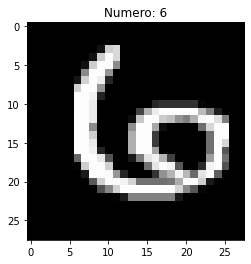

prediccion:  2


In [88]:
graficar_alguna_img_yeta()


# EJERCICIO 3



## Implemetar una funcion en Python que dada una matriz A halle la descomposicion SVD de A, por el metodo de la potencia. Llamamos descomposicion SVD en valores singulares a: $$A = U ΣV T $$ Implemetar una funcion en Python que dada una matriz A halle la descomposicion SVD de A, por el metodo de la potencia.
